In [24]:
import pandas as pd
wine_df = pd.read_csv('../newdataset/new_winequality.csv')
diabetes_df = pd.read_csv('../newdataset/new_diabetes.csv')

In [25]:
from sklearn.model_selection import train_test_split

# 資料分割 def
def split_data(df, target_column, test_size=0.2, random_state=42):

    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Usage example:
# Assuming 'origin_train_df' is your DataFrame and 'quality' is the target column
# X_train, X_test, y_train, y_test = split_data(origin_train_df, 'quality')
# print(X_train, y_train)
X_train_wine, X_test_wine, y_train_wine, y_test_wine = split_data(wine_df, 'quality')
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = split_data(diabetes_df, 'diabetes')

In [26]:
from sklearn.preprocessing import MinMaxScaler

def apply_minmax_scaler(X_train, X_test):

    scaler = MinMaxScaler()
    scaler.fit(X_train)  # Fit the scaler to the training data only
    
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert the scaled arrays back to DataFrame for better handling in pandas
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
    
    return X_train_scaled, X_test_scaled

# 使用範例:
# X_train_scaled, X_test_scaled = apply_minmax_scaler(X_train, X_test)
X_train_scaled_wine, X_test_scaled_wine = apply_minmax_scaler(X_train_wine, X_test_wine)
X_train_scaled_diabetes, X_test_scaled_diabetes = apply_minmax_scaler(X_train_diabetes, X_test_diabetes)

In [27]:
from imblearn.over_sampling import SMOTE

def smote_sampling(X_train, y_train):
    # SMOTE过采样
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    return X_train_smote, y_train_smote

X_train_smote_wine, y_train_smote_wine = smote_sampling(X_train_scaled_wine, y_train_wine)
X_train_smote_diabetes, y_train_smote_diabetes = smote_sampling(X_train_scaled_diabetes, y_train_diabetes)
X_train_smote_wine, y_train_smote_wine, X_train_smote_diabetes, y_train_smote_diabetes

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0          0.362832          0.390411     0.310000        0.143836   0.123539   
 1          0.132743          0.061644     0.400000        0.034247   0.090150   
 2          0.557522          0.184932     0.470000        0.061644   0.176962   
 3          0.371681          0.386986     0.260000        0.047945   0.126878   
 4          0.336283          0.626712     0.150000        0.349315   0.101836   
 ...             ...               ...          ...             ...        ...   
 2449       0.513288          0.335595     0.490000        0.082192   0.313517   
 2450       0.185837          0.657530     0.000000        0.131377   0.127029   
 2451       0.201026          0.474802     0.000000        0.024050   0.410514   
 2452       0.172701          0.548779     0.042880        0.263692   0.106692   
 2453       0.323746          0.348133     0.189286        0.040280   0.112728   
 
       free su

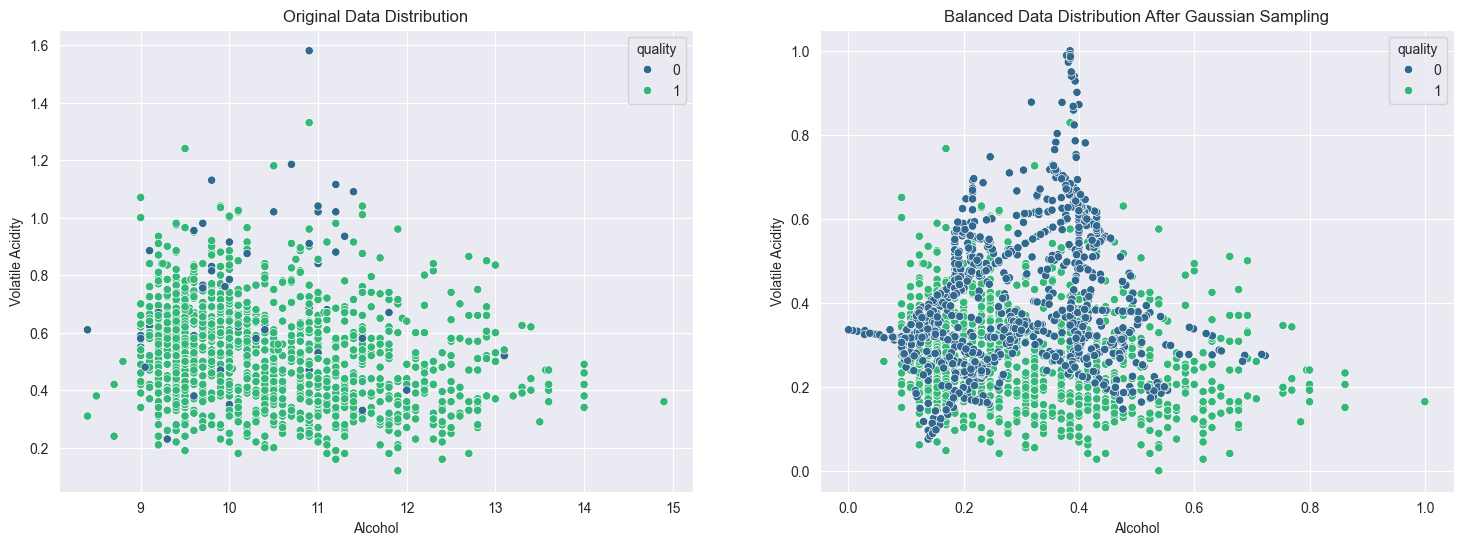

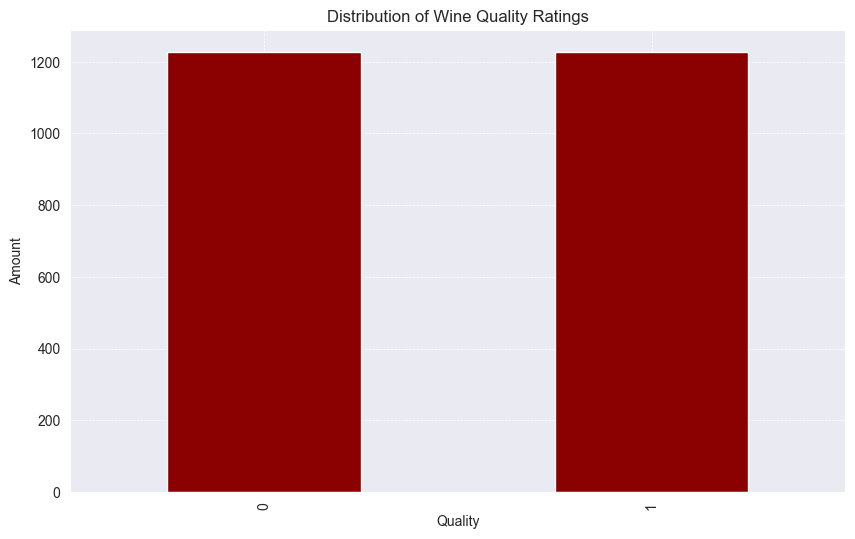

In [28]:
# 将过采样的特征和目标组合成一个DataFrame
smote_train_df = pd.DataFrame(X_train_smote_wine, columns=wine_df.columns[:-1])
smote_train_df['quality'] = y_train_smote_wine

import seaborn as sns
import matplotlib.pyplot as plt
# Setting up the subplot grid
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Original data plot
sns.scatterplot(ax=ax[0], data=wine_df, x='alcohol', y='volatile acidity', hue='quality', palette='viridis')
ax[0].set_title('Original Data Distribution')
ax[0].set_xlabel('Alcohol')
ax[0].set_ylabel('Volatile Acidity')

# Balanced data plot
sns.scatterplot(ax=ax[1], data=smote_train_df, x='alcohol', y='volatile acidity', hue='quality', palette='viridis')
ax[1].set_title('Balanced Data Distribution After Gaussian Sampling')
ax[1].set_xlabel('Alcohol')
ax[1].set_ylabel('Volatile Acidity')
plt.show()

plt.figure(figsize=(10, 6))
smote_train_df['quality'].value_counts().sort_index().plot(kind='bar', color='darkred')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Amount')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

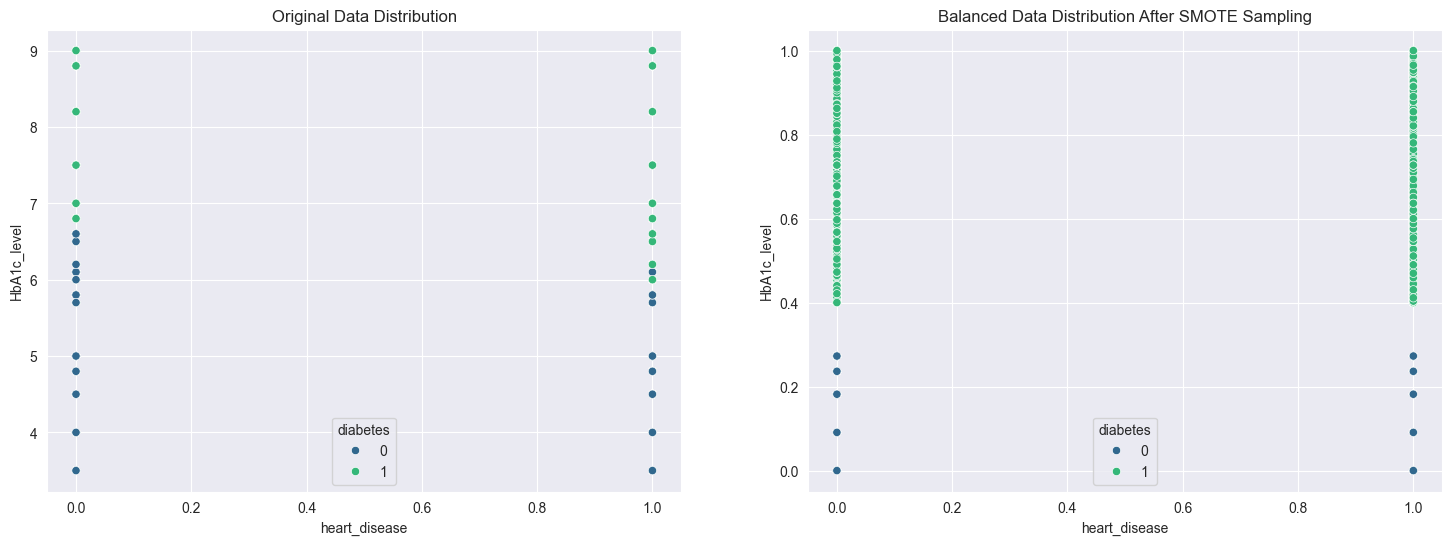

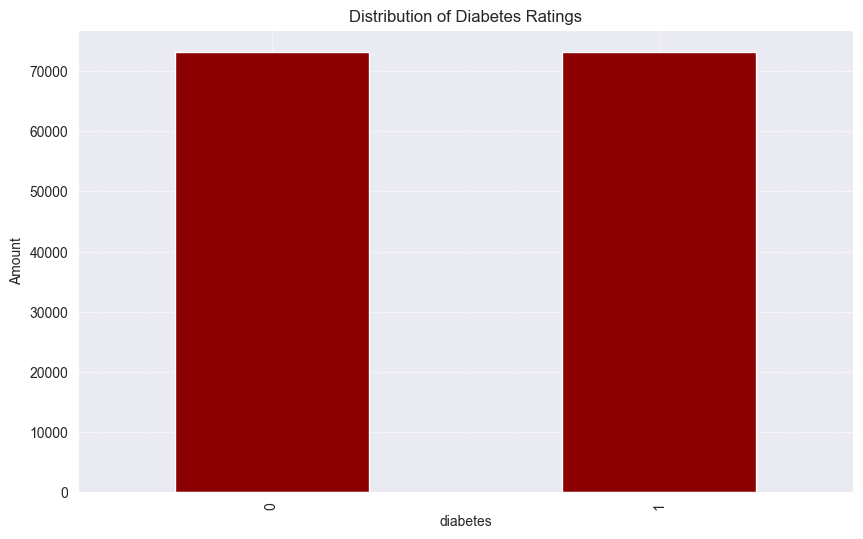

In [29]:
# 将过采样的特征和目标组合成一个DataFrame
smote_train_df_dia = pd.DataFrame(X_train_smote_diabetes, columns=diabetes_df.columns[:-1])
smote_train_df_dia['diabetes'] = y_train_smote_diabetes

import seaborn as sns
import matplotlib.pyplot as plt
# Setting up the subplot grid
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Original data plot
sns.scatterplot(ax=ax[0], data=diabetes_df, x='heart_disease', y='HbA1c_level', hue='diabetes', palette='viridis')
ax[0].set_title('Original Data Distribution')
ax[0].set_xlabel('heart_disease')
ax[0].set_ylabel('HbA1c_level')

# Balanced data plot
sns.scatterplot(ax=ax[1], data=smote_train_df_dia, x='heart_disease', y='HbA1c_level', hue='diabetes', palette='viridis')
ax[1].set_title('Balanced Data Distribution After SMOTE Sampling')
ax[1].set_xlabel('heart_disease')
ax[1].set_ylabel('HbA1c_level')
plt.show()

plt.figure(figsize=(10, 6))
smote_train_df_dia['diabetes'].value_counts().sort_index().plot(kind='bar', color='darkred')
plt.title('Distribution of Diabetes Ratings')
plt.xlabel('diabetes')
plt.ylabel('Amount')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, matthews_corrcoef
import matplotlib.pyplot as plt

In [31]:
def display_confusion_matrix(y_true, y_pred):

    # Generating the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Assuming binary classification for simplicity; adjust if needed for multi-class
    cm_df = pd.DataFrame(cm, 
                         index=['Actual Negative:0', 'Actual Positive:1'], 
                         columns=['Predicted Negative:0', 'Predicted Positive:1'])

    # Extracting TN, FP, FN, TP
    # TN, FP, FN, TP = cm.ravel()
    # print(f"True Negatives (TN): {TN}")
    # print(f"False Positives (FP): {FP}")
    # print(f"False Negatives (FN): {FN}")
    # print(f"True Positives (TP): {TP}")

    return cm_df

In [32]:
def train_evaluate_lr(X_train, X_test, y_train, y_test, model_name = 'logistic regression'):
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train, y_train)
    predictions = lr_model.predict(X_test)
    
    recall = recall_score(y_test, predictions, zero_division=1)
    cm = confusion_matrix(y_test, predictions)
    
    # 計算G-mean
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    g_mean = np.sqrt(recall * specificity)
    
    # 計算評估指標
    mcc = matthews_corrcoef(y_test, predictions)
    
    print(f"{model_name}:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
    print("Precision:", precision_score(y_test, predictions, zero_division=1))
    print("Recall:", recall)
    print("G-mean:", g_mean)
    print("MCC:", mcc)
    print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))
    print("Confusion Matrix:\n", display_confusion_matrix(y_test, predictions))

    # ROC Curve
    probs = lr_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    print("ROC_AUC:", roc_auc)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', 
             lw=2, label=f'LR (AUC = {roc_auc:.4f}, G_MEAN = {g_mean:.4f}, MCC = {mcc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [33]:
def train_evaluate_rf(X_train, X_test, y_train, y_test, model_name = 'Random Forest'):
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    predictions = rf_model.predict(X_test)
    recall = recall_score(y_test, predictions, zero_division=1)
    cm = confusion_matrix(y_test, predictions)
    
    # 計算G-mean
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    g_mean = np.sqrt(recall * specificity)
    
    # 計算評估指標
    mcc = matthews_corrcoef(y_test, predictions)

    print(f"{model_name}:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
    print("Precision:", precision_score(y_test, predictions, zero_division=1))
    print("Recall:", recall)
    print("G-mean:", g_mean)
    print("MCC:", mcc)
    print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))
    print("Confusion Matrix:\n", display_confusion_matrix(y_test, predictions))

    # ROC Curve
    probs = rf_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    
    print("ROC_AUC:", roc_auc)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', 
             lw=2, label=f'RF (AUC = {roc_auc:.4f}, G_MEAN = {g_mean:.4f}, MCC = {mcc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Random Forest ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [34]:
import numpy as np

def train_evaluate_svm(X_train, X_test, y_train, y_test, model_name = 'SVM'):
    # 初始化SVM模型  
    svm_model = SVC(kernel='linear', probability=True, random_state=42)
    svm_model.fit(X_train, y_train)  # 训练模型
    predictions = svm_model.predict(X_test)  # 进行预测
    recall = recall_score(y_test, predictions, zero_division=1)
    cm = confusion_matrix(y_test, predictions)
    
    # 計算G-mean
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    g_mean = np.sqrt(recall * specificity)
    
    # 計算評估指標
    mcc = matthews_corrcoef(y_test, predictions)

    # 打印性能指标
    print(f"{model_name}:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
    print("Precision:", precision_score(y_test, predictions, zero_division=1))
    print("Recall:", recall)
    print("G-mean:", g_mean)
    print("MCC:", mcc)
    print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))
    print("Confusion Matrix:\n", display_confusion_matrix(y_test, predictions))

    # ROC 曲線
    probs = svm_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    print("ROC_AUC:", roc_auc)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', 
             lw=2, label=f'SVM (AUC = {roc_auc:.4f}, G_MEAN = {g_mean:.4f}, MCC = {mcc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('SVM ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


Wine Dataset Logistic Regression:
Accuracy: 0.765625
F1 Score: 0.8399776677933366
Precision: 0.9957627118644068
Recall: 0.7605177993527508
G-mean: 0.8314925240754782
MCC: 0.27726881793305
Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.91      0.21        11
           1       1.00      0.76      0.86       309

    accuracy                           0.77       320
   macro avg       0.56      0.83      0.54       320
weighted avg       0.97      0.77      0.84       320

Confusion Matrix:
                    Predicted Positive:1  Predicted Negative:0
Actual Positive:1                    10                     1
Actual Negative:0                    74                   235
ROC_AUC: 0.9446896145925272


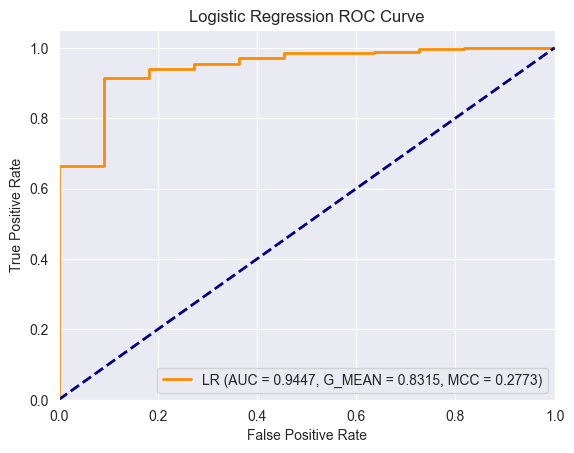

Wine Dataset Random Forest:
Accuracy: 0.946875
F1 Score: 0.9479868402508632
Precision: 0.974025974025974
Recall: 0.970873786407767
G-mean: 0.5145714332620798
MCC: 0.23360857121793746
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.27      0.26        11
           1       0.97      0.97      0.97       309

    accuracy                           0.95       320
   macro avg       0.61      0.62      0.62       320
weighted avg       0.95      0.95      0.95       320

Confusion Matrix:
                    Predicted Positive:1  Predicted Negative:0
Actual Positive:1                     3                     8
Actual Negative:0                     9                   300
ROC_AUC: 0.8196528390703147


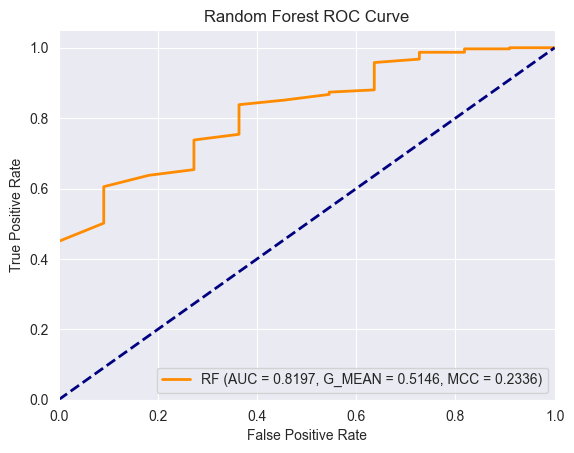

Wine Dataset SVM:
Accuracy: 0.7625
F1 Score: 0.8378829656862747
Precision: 0.9957446808510638
Recall: 0.7572815533980582
G-mean: 0.8297215049740585
MCC: 0.27488385327782827
Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.91      0.21        11
           1       1.00      0.76      0.86       309

    accuracy                           0.76       320
   macro avg       0.56      0.83      0.53       320
weighted avg       0.97      0.76      0.84       320

Confusion Matrix:
                    Predicted Positive:1  Predicted Negative:0
Actual Positive:1                    10                     1
Actual Negative:0                    75                   234
ROC_AUC: 0.9414533686378347


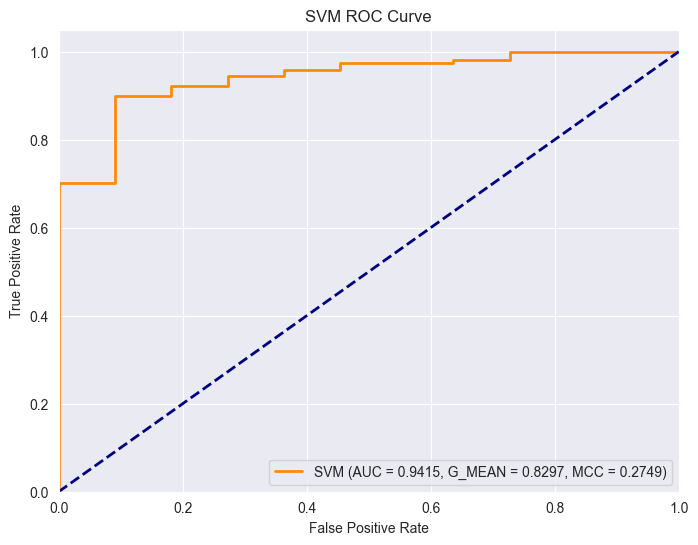

In [21]:
# lr_wine_result = train_evaluate_lr(X_train_smote_wine, X_test_scaled_wine, y_train_smote_wine, y_test_wine, model_name='Wine Dataset Logistic Regression')
# rf_wine_result = train_evaluate_rf(X_train_smote_wine, X_test_scaled_wine, y_train_smote_wine, y_test_wine, model_name='Wine Dataset Random Forest')
# svm_wine_result = train_evaluate_svm(X_train_smote_wine, X_test_scaled_wine, y_train_smote_wine, y_test_wine, model_name='Wine Dataset SVM')

Diabetes Dataset Logistic Regression:
Accuracy: 0.88815
F1 Score: 0.9046454906634576
Precision: 0.4249645390070922
Recall: 0.8770491803278688
G-mean: 0.8830970031491213
MCC: 0.5620107793292438
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94     18292
           1       0.42      0.88      0.57      1708

    accuracy                           0.89     20000
   macro avg       0.71      0.88      0.75     20000
weighted avg       0.94      0.89      0.90     20000

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                 16265                  2027
Actual Positive:1                   210                  1498
ROC_AUC: 0.961637562728181


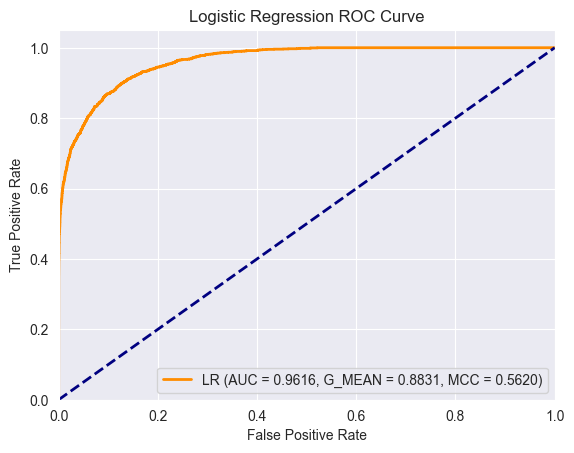

Diabetes Dataset Random Forest:
Accuracy: 0.9603
F1 Score: 0.9599336613889607
Precision: 0.7786585365853659
Recall: 0.7476580796252927
G-mean: 0.8560496473777227
MCC: 0.7413721675219729
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     18292
           1       0.78      0.75      0.76      1708

    accuracy                           0.96     20000
   macro avg       0.88      0.86      0.87     20000
weighted avg       0.96      0.96      0.96     20000

Confusion Matrix:
                    Predicted Negative:0  Predicted Positive:1
Actual Negative:0                 17929                   363
Actual Positive:1                   431                  1277
ROC_AUC: 0.9669113806166016


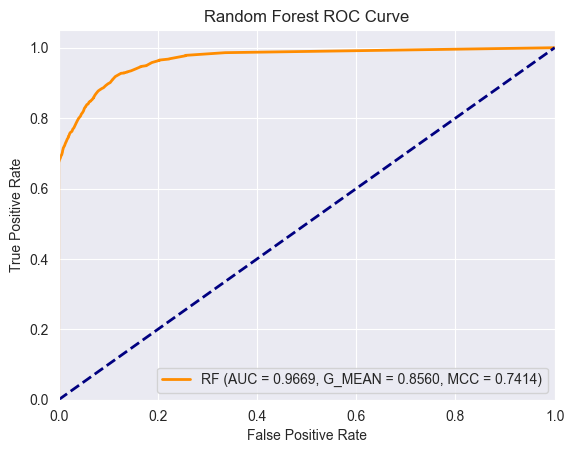

In [35]:
lr_diabetes_result = train_evaluate_lr(X_train_smote_diabetes, X_test_scaled_diabetes, y_train_smote_diabetes, y_test_diabetes, model_name='Diabetes Dataset Logistic Regression')
rf_diabetes_result = train_evaluate_rf(X_train_smote_diabetes, X_test_scaled_diabetes, y_train_smote_diabetes, y_test_diabetes, model_name='Diabetes Dataset Random Forest')